# Sales Data Analysis – Sample Sales Dataset
By Martynas Džiugas

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv',
                 encoding='latin1')  # prevents weird character issues

df.head()

/kaggle/input/sample-sales-data/sales_data_sample.csv


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [33]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


In [34]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [35]:
df['PRODUCTLINE'].value_counts()

PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

In [36]:
df['COUNTRY'].value_counts().head(10)

COUNTRY
USA          1004
Spain         342
France        314
Australia     185
UK            144
Italy         113
Finland        92
Norway         85
Singapore      79
Canada         70
Name: count, dtype: int64

Converting ORDERDATE column to datetime
This dataset stores dates as strings, which prevents proper time-series analysis.
We convert `ORDERDATE` to datetime so we can group and analyze sales by year/month.

In [15]:
print("Before conversion:")
print(df['ORDERDATE'].head())
print(df['ORDERDATE'].dtype)

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

print("\nAfter conversion:")
print(df['ORDERDATE'].head())
print(df['ORDERDATE'].dtype)

Before conversion:
0     2/24/2003 0:00
1      5/7/2003 0:00
2      7/1/2003 0:00
3     8/25/2003 0:00
4    10/10/2003 0:00
Name: ORDERDATE, dtype: object
object

After conversion:
0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: ORDERDATE, dtype: datetime64[ns]
datetime64[ns]


In [21]:
# Check rows before dropping
rows_before = df.shape[0]

# Drop rows with missing SALES or ORDERDATE
df = df.dropna(subset=['SALES', 'ORDERDATE'])

# Check rows after
rows_after = df.shape[0]

print(f"Rows before: {rows_before}")
print(f"Rows after: {rows_after}")
print(f"Rows removed: {rows_before - rows_after}")

Rows before: 2823
Rows after: 2823
Rows removed: 0


Q1: How do total sales change by year?

<Axes: title={'center': 'Total Sales by Year'}, xlabel='YEAR_ID'>

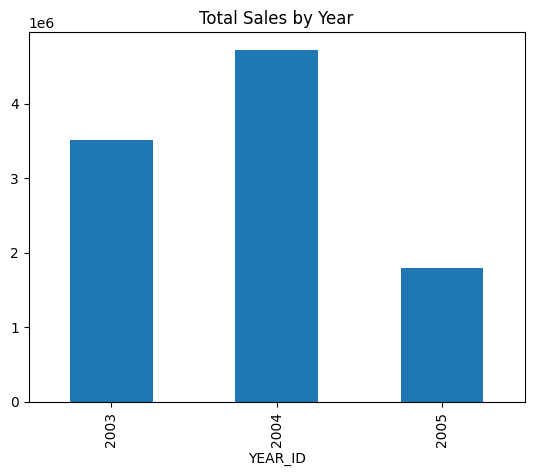

In [10]:
sales_by_year = df.groupby('YEAR_ID')['SALES'].sum()
sales_by_year.plot(kind='bar', title='Total Sales by Year')

Sales peaked in 2004, then dropped sharply in 2005.

Q2: Which product lines bring the most revenue?

<Axes: title={'center': 'Sales by Product Line'}, xlabel='PRODUCTLINE'>

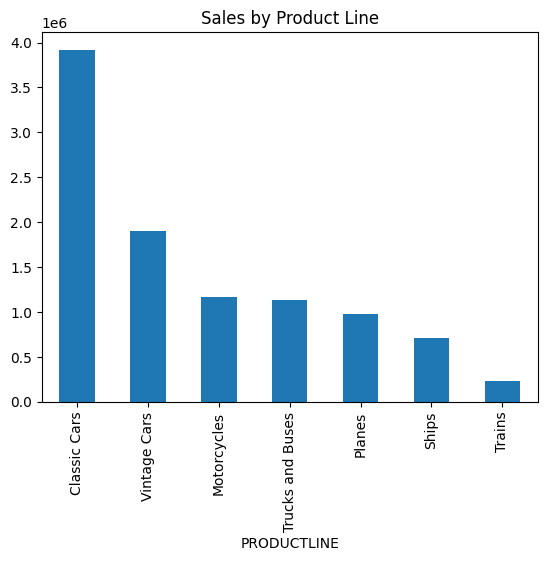

In [11]:
sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
sales_by_productline.plot(kind='bar', title='Sales by Product Line')
=

Classic Cars and Vintage Cars generate most revenue.

Q3: Which countries are most valuable?

<Axes: title={'center': 'Top 10 Countries by Sales'}, xlabel='COUNTRY'>

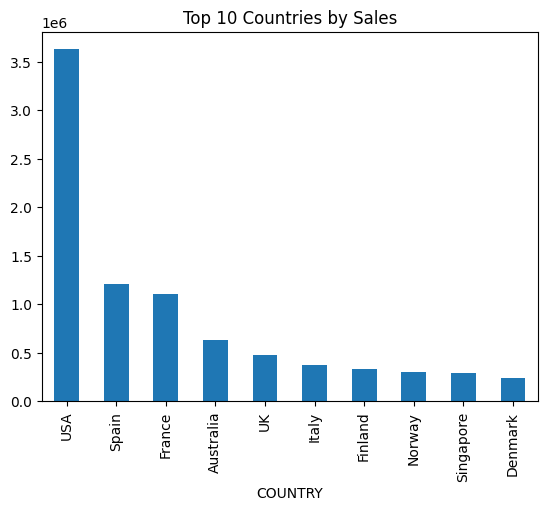

In [43]:
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
sales_by_country.plot(kind='bar', title='Top 10 Countries by Sales')

The US, Spain and France account for most sales.

Q4: Does deal size matter?

<Axes: title={'center': 'Sales by Deal Size'}, xlabel='DEALSIZE'>

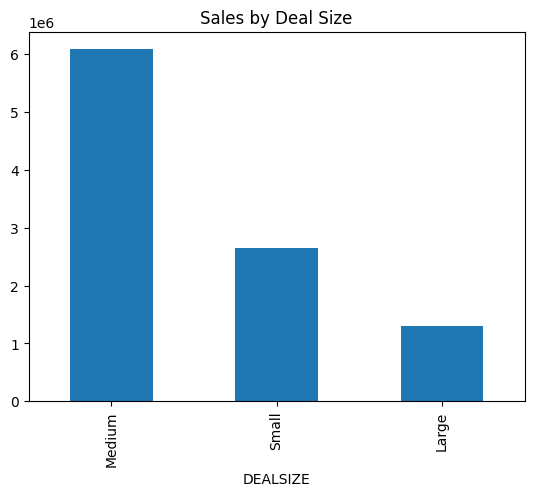

In [44]:
sales_by_dealsize = df.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False)
sales_by_dealsize.plot(kind='bar', title='Sales by Deal Size')

Medium deal sizes contribute the most sales overall.